In [3]:
#Naive-Bayes
import pandas as pd

data = pd.read_csv(r'C:\Users\Azizg\Desktop\KFC_Yorumlar.csv') 

species=data[["Sentiment_Analysis"]].values

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
svd = TruncatedSVD(n_components=100)
X_tfidf = vectorizer.fit_transform(data.iloc[:,0].astype(str))
X_svd = svd.fit_transform(X_tfidf)
a = X_svd

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a,species,test_size=0.30,random_state=0)

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train, y_train.ravel())

result=gnb.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,result))
print(classification_report(y_test,result))
print(accuracy_score(y_test, result))

[[7948 1177  378]
 [ 169  207   62]
 [1110  931 1715]]
              precision    recall  f1-score   support

          -1       0.86      0.84      0.85      9503
           0       0.09      0.47      0.15       438
           1       0.80      0.46      0.58      3756

    accuracy                           0.72     13697
   macro avg       0.58      0.59      0.53     13697
weighted avg       0.82      0.72      0.75     13697

0.7205957508943565


In [2]:
#SVM
import pandas as pd

data = pd.read_csv(r'C:\Users\Azizg\Desktop\KFC_Yorumlar.csv') 

label=data[["Sentiment_Analysis"]].values

features=data[["Description"]]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(data.iloc[:,0].astype(str))

features=sentence_train_vector

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.30,random_state=0)

from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train.ravel())
result=svc.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,result))
print(classification_report(y_test,result))
print(accuracy_score(y_test, result))

[[9416    5   82]
 [ 324   41   73]
 [1685    3 2068]]
              precision    recall  f1-score   support

          -1       0.82      0.99      0.90      9503
           0       0.84      0.09      0.17       438
           1       0.93      0.55      0.69      3756

    accuracy                           0.84     13697
   macro avg       0.86      0.55      0.59     13697
weighted avg       0.85      0.84      0.82     13697

0.8414251295904213


In [1]:
#Random Forest
import pandas as pd

data = pd.read_csv(r'C:\Users\Azizg\Desktop\KFC_Yorumlar.csv') 

label=data[["Sentiment_Analysis"]].values

features=data[["Description"]]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(data.iloc[:,0].astype(str))

features=sentence_train_vector

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.30,random_state=0)

from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train.ravel())

predictions = text_classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[9047    7  449]
 [ 241   56  141]
 [ 861   10 2885]]
              precision    recall  f1-score   support

          -1       0.89      0.95      0.92      9503
           0       0.77      0.13      0.22       438
           1       0.83      0.77      0.80      3756

    accuracy                           0.88     13697
   macro avg       0.83      0.62      0.65     13697
weighted avg       0.87      0.88      0.86     13697

0.8752281521501059


-1    31606
 1    12542
Name: Sentiment_Analysis, dtype: int64
37626
94818
12542
31606
(30903, 100) (30903, 2)
(13245, 100) (13245, 2)
Build model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_3 (Dense)              (None, 

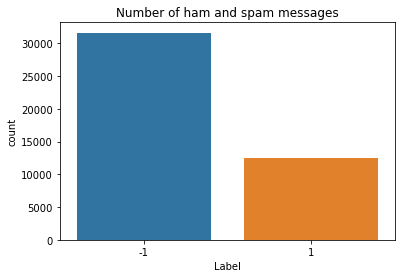

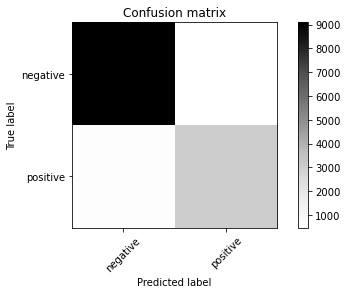

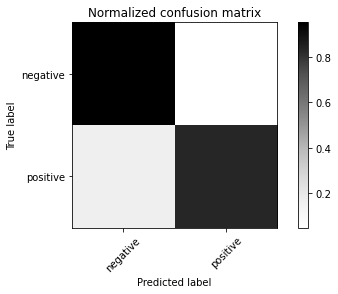

In [4]:
#LSTM
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import re
import warnings 
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\Azizg\Desktop\KFC_Yorumlar.csv')
data = data[data.Sentiment_Analysis != 0]
print(data.Sentiment_Analysis.value_counts())
sns.countplot(data.Sentiment_Analysis)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2


data['Description'] = data['Description'].apply(lambda x: str(x).lower())
data['Description'] = data['Description'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['Sentiment_Analysis'] == 1].size)
print(data[ data['Sentiment_Analysis'] == -1].size)

print((data['Sentiment_Analysis'].values == 1).sum())
print((data['Sentiment_Analysis'].values == -1).sum())

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

tokenizer = Tokenizer(nb_words = max_features, split=' ')
tokenizer.fit_on_texts(data['Description'].values)
X = tokenizer.texts_to_sequences(data['Description'].values)
X = pad_sequences(X, maxlen = maxlen)

Y = pd.get_dummies(data['Sentiment_Analysis']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

yhat = model.predict(X_test, verbose = 2, batch_size = batch_size)
from sklearn import metrics
print(metrics.classification_report(Y_test[:,1], np.round(yhat[:,1]) ,target_names = ["negative", "positive"]))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

score = ['negative', 'positive']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(score)))
    plt.xticks(tick_marks, score, rotation=45)
    plt.yticks(tick_marks, score)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(Y_test[:,1], np.round(yhat[:,1]))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()


In [9]:
data = pd.read_csv(r'C:\Users\Azizg\Desktop\KFC_Yorumlar.csv')
print(data.Sentiment_Analysis.value_counts())

-1    31606
 1    12542
 0     1506
Name: Sentiment_Analysis, dtype: int64


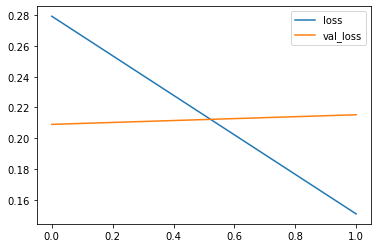

In [1]:
#LSTM greafik
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import re
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from keras.utils.np_utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import warnings 
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\Azizg\Desktop\KFC_Yorumlar.csv')
data = data[data.Sentiment_Analysis != 0]
print(data.Sentiment_Analysis.value_counts())
sns.countplot(data.Sentiment_Analysis)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2


data['Description'] = data['Description'].apply(lambda x: str(x).lower())
data['Description'] = data['Description'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['Sentiment_Analysis'] == 1].size)
print(data[ data['Sentiment_Analysis'] == -1].size)

print((data['Sentiment_Analysis'].values == 1).sum())
print((data['Sentiment_Analysis'].values == -1).sum())

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

tokenizer = Tokenizer(nb_words = max_features, split=' ')
tokenizer.fit_on_texts(data['Description'].values)
X = tokenizer.texts_to_sequences(data['Description'].values)
X = pad_sequences(X, maxlen = maxlen)

Y = pd.get_dummies(data['Sentiment_Analysis']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test),callbacks=[plot_losses],verbose=0)
